# Night Summary for MJD 58905 (starting evening of 2020-02-25)


Sun json
Civil (6°)	Nautical (12°)	Astronomical (18°)

Evening	2020-02-26 01:45:58Z	2020-02-26 02:13:51Z	2020-02-26 02:42:10Z

Midpoint	2020-02-26 07:39:09Z	2020-02-26 07:39:11Z	2020-02-26 07:39:12Z

Morning	2020-02-26 13:32:21Z	2020-02-26 13:04:31Z	2020-02-26 12:36:14Z

Moon json
Phase
5.7%

Moonrise
2020-02-25 15:22:21Z

Moonset
2020-02-26 03:19:53Z

52081	SV tile 70506 M67)	04:14:05Z	133.41751	11.67719	300.0	science	DESI

52082	SV tile 70506 M67)	04:25:20Z	133.41678	11.67739	300.0	science	DESI

52083	SV tile 70506 M67)	04:36:17Z	133.41621	11.67754	300.0	science	DESI

52084	SV tile 70508 M67)	04:49:03Z	133.41557	11.67770	300.0	science	DESI

52085	SV tile 70508 M67)	05:02:35Z	133.41493	11.67783	300.0	science	DESI

52086	SV tile 70508 M67)	05:14:34Z	133.41439	11.67792	300.0	science	DESI

52087	SV tile 70508 M67)	05:25:31Z	133.41392	11.67798	300.0	science	DESI

52088	SV tile 70508 M67)	05:40:15Z	133.41331	11.67804	300.0	science	DESI

52089	SV tile 70508 M67)	05:51:30Z	133.41284	11.67806	300.0	science	DESI

52090	SV tile 70502	06:07:12Z	180.01200	-0.51026	900.0	science	DESI

52112	SV tile 70502	07:03:08Z	180.00693	-0.50838	900.0	science	DESI

52113	SV tile 70502	07:26:28Z	180.00532	-0.50784	900.0	science	DESI

52114	SV tile 70502	07:49:12Z	180.00393	-0.50744	900.0	science	DESI

52115	SV tile 70502	08:10:21Z	180.00276	-0.50717	900.0	science	DESI

52116	SV tile 70502	08:32:35Z	180.00163	-0.50699	900.0	science	DESI

In [29]:
import numpy as np
import fitsio
from astropy.table import Table, vstack, hstack
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
tile_id = 70502
path = "/project/projectdirs/desi/spectro/redux/daily/tiles/{}/20200225".format(tile_id)

In [31]:
zbest_files = glob.glob(path+"/zbest*")

In [32]:
zbest_files

['/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-3-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-7-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-9-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-6-70502-20200225.fits',
 '/project/projectdirs/desi/spectro/redux/daily/tiles/70502/20200225/zbest-0-70502-20200225.fits']

In [33]:
zbest_data = {}
zbest_fibermap = {}
for i, zbest_file in enumerate(zbest_files):
    zbest_data[i] = Table.read(zbest_file, 'ZBEST')
    zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    print(len(zbest_data[i]))

500
500
500
500
500


In [56]:
zbest_data_all = vstack(list(zbest_data.values()))
zbest_data_all.sort('TARGETID')
fibermap_all = vstack(list(zbest_fibermap.values()))
fibermap_all.sort('TARGETID')

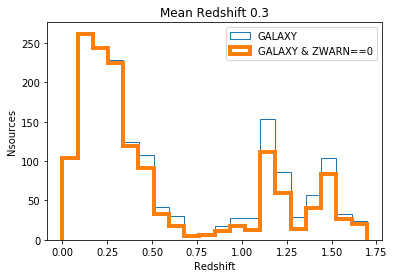

In [57]:
is_galaxy = zbest_data_all['SPECTYPE']=='GALAXY' 
no_warning = zbest_data_all['ZWARN']==0
_=plt.hist(zbest_data_all['Z'][is_galaxy], bins=20, label='GALAXY', histtype='step')
_=plt.hist(zbest_data_all['Z'][is_galaxy & no_warning], bins=20, label='GALAXY & ZWARN==0', histtype='step', linewidth=4)
plt.title("Mean Redshift {:.1f}".format(np.median(zbest_data_all['Z'][is_galaxy & no_warning])))
plt.xlabel('Redshift')
plt.ylabel('Nsources')
plt.legend()

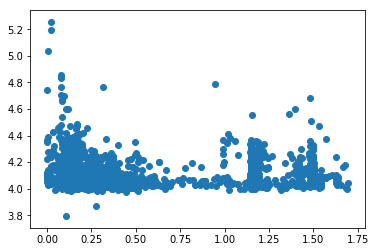

In [58]:
plt.scatter(zbest_data_all['Z'][is_galaxy & no_warning], np.log10(zbest_data_all['CHI2'][is_galaxy & no_warning]))

In [59]:
zbest_data_all

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32
35185712445786261,25651.32187811491,6299.002370114701 .. 0.0,0.0005226517775207594,2.8357801158421117e-06,0,7758,STAR,K,5,14799.273653944758,0,0
35185712445786287,10746.545581519604,1054.5767915789954 .. 72.48115893585835,1.6556743778982108,8.87707880498596e-05,0,7758,GALAXY,,10,17.863597571849823,0,0
35185712445788791,10173.758414924145,-26.21945099952736 .. -5.667924129857734,0.6669170195157538,3.807474934522135e-05,4,7757,GALAXY,,10,2.4792800545692444,0,0
35185712445789423,14822.562668060835,1563.979395023786 .. 0.0,-4.8250524092662925e-05,4.772979295170034e-06,0,7758,STAR,K,5,6413.032216953163,0,0
35185712445789787,12523.552356250799,1701.449763631042 .. 0.0,0.00025723635169548885,7.079237380293098e-06,0,7731,STAR,K,5,1640.3872114343285,0,0
35185712449979202,19150.939883377832,2919.8797268141307 .. 0.0,6.494017983474686e-05,1.7491254641872203e-05,0,7759,STAR,F,5,6390.501035842615,0,0
35185712449979490,35221.86532576348,2302.6895190322452 .. 0.0,-5.97581183062811e-05,3.4529750412649034e-06,0,7758,STAR,K,5,4623.697977587923,0,0
35185712449979800,14898.67607331276,859.6701565184374 .. 96.29253542342148,0.28329715376963,6.786155919140386e-06,0,7759,GALAXY,,10,1484.541034936905,0,0
35185712449979886,22373.098727345467,2797.1978850440423 .. 11.16534323366582,0.14791612512038504,1.863783107711742e-05,0,7759,GALAXY,,10,1647.0493733882904,0,0


In [54]:
fibermap_all['TARGETID']==

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,MEAN_DELTA_X,MEAN_DELTA_Y,FIBER_RA,FIBER_DEC,RMS_DELTA_X,RMS_DELTA_Y,FIRST_FIBER,LAST_FIBER,NUM_FIBER
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,str3,float32,float32,int16,int32,float64,int32,int32,int16,int32,str8,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,str1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
35185748663601958,3,416,3416,1626,0,178.39599556184356,-0.48223931068220244,-6.4461484,1.7417842,2.9534934,12.62268,2015.5,5400.0,545,1,TGT,407.07156,4.4561753,0,1000,0.5425550429587221,65535,99,8000,328201,1783m005,2854,PSF,188242880000000.0,824521400000000.0,0.024288718,17.875319,31.671986,39.975246,475.19608,277.58923,135.96376,0.93062437,0.95272154,0.9732727,3.291751e-05,9.508674e-05,0.00016581913,0.066478215,0.05222662,0.034148715,0.99917954,0.9964628,0.99878013,4,5,6,2174.5818,806.0245,248.55078,1194.0028,510.2307,118.59543,13.980249,5.9044037,-41.7884,-1371.2539,2.1902003,0.41514254,0.00058863143,7.905172e-06,0.9958922,0.9974753,0.999461,0.99979645,0,0,0,13.880992,24.594727,31.042585,13.880992,24.594727,31.042585,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3794933425144852352,G2,18.874731,494.21475,19.341774,32.04855,18.245415,79.725464,1.2374464,0.41554952,True,0.51479167,True,0.63003856,12.412532,S,545,2462,1,26964,0.0,0.0,0.0,0.0,0,0,0,3,406.678,4.313,-0.003833333333333333,0.003666666666666667,0.0,0.0,0.008708233651742088,0.013662601021279466,1626,1626,1
35185748663602130,3,373,3373,1641,512,178.49318351638934,-0.4753303973482799,0.0,0.0,0.0,0.0,0.0,5400.0,72057594037928192,1,TGT,380.47778,6.1843643,0,5000,0.9308386061